In [2]:
from itscalledsoccer.client import AmericanSoccerAnalysis
import pandas as pd

asa = AmericanSoccerAnalysis()

# Step 1: Get Teams
teams = asa.get_teams()
print(teams.team_name)

# Step 2: Find Portland Timbers FC
timbers_rows = teams[teams["team_name"] == "Portland Timbers FC"]
timbers_id = timbers_rows["team_id"].values[0]   # <<< just grab the string

# Step 3: Get player g+ just for Timbers
gplus_data = asa.get_player_goals_added(
    leagues=["mls"],
    
    team_ids=[timbers_id],  # Now passing a real string inside a list
    split_by_games=True
)

player_data = asa.get_players(leagues=["mls"])

# Step 4: Check what we got
print(gplus_data.head())
print(gplus_data.columns)

# Step 5: Find columns
print(gplus_data['data'])

0                   Bay FC
1             Houston Dash
2          Boston Breakers
3      Kansas City Current
4         Seattle Reign FC
              ...         
169     Huntsville City FC
170         Chattanooga FC
171      Inter Miami CF II
172       Atlanta United 2
173     Portland Timbers 2
Name: team_name, Length: 174, dtype: object
    player_id     game_id     team_id general_position  minutes_played  \
0  0Oq6lLZgM6  0x5gbVvZM7  WBLMvYAQxe               ST              67   
1  0Oq6lLZgM6  0x5gk4PR57  WBLMvYAQxe               ST              75   
2  0Oq6lLZgM6  2lqRlOb4Mr  WBLMvYAQxe               ST              87   
3  0Oq6lLZgM6  2lqRXY9WMr  WBLMvYAQxe               ST              92   
4  0Oq6lLZgM6  2lqRXYv0Mr  WBLMvYAQxe               ST              85   

                                                data  
0  [{'action_type': 'Dribbling', 'goals_added_raw...  
1  [{'action_type': 'Dribbling', 'goals_added_raw...  
2  [{'action_type': 'Dribbling', 'goals_added_raw

In [3]:
pd.DataFrame(gplus_data['data'][5])
len(gplus_data['player_id'].unique())

114

In [4]:
# Merge player names onto g_added data

main_df = pd.merge(gplus_data, player_data, on = 'player_id', how = 'left')
main_df.head()

,player_id,game_id,team_id,general_position,minutes_played,data,player_name,birth_date,nationality,primary_broad_position,primary_general_position,secondary_broad_position,secondary_general_position,season_name,height_ft,height_in,weight_lb,competition
0,0Oq6lLZgM6,0x5gbVvZM7,WBLMvYAQxe,ST,67,"[{'action_type': 'Dribbling', 'goals_added_raw...",Maximiliano Urruti,1991-02-22,Argentina,FW,ST,NaN,NaN,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...",6.0,0.0,165.0,mls
1,0Oq6lLZgM6,0x5gk4PR57,WBLMvYAQxe,ST,75,"[{'action_type': 'Dribbling', 'goals_added_raw...",Maximiliano Urruti,1991-02-22,Argentina,FW,ST,NaN,NaN,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...",6.0,0.0,165.0,mls
2,0Oq6lLZgM6,2lqRlOb4Mr,WBLMvYAQxe,ST,87,"[{'action_type': 'Dribbling', 'goals_added_raw...",Maximiliano Urruti,1991-02-22,Argentina,FW,ST,NaN,NaN,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...",6.0,0.0,165.0,mls
3,0Oq6lLZgM6,2lqRXY9WMr,WBLMvYAQxe,ST,92,"[{'action_type': 'Dribbling', 'goals_added_raw...",Maximiliano Urruti,1991-02-22,Argentina,FW,ST,NaN,NaN,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...",6.0,0.0,165.0,mls
4,0Oq6lLZgM6,2lqRXYv0Mr,WBLMvYAQxe,ST,85,"[{'action_type': 'Dribbling', 'goals_added_raw...",Maximiliano Urruti,1991-02-22,Argentina,FW,ST,NaN,NaN,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...",6.0,0.0,165.0,mls


In [49]:
# Let's add some team information to our DF (DO LATER)
teams = asa.get_teams()
print(teams.columns)
games = asa.get_games()
print(games.columns)

subset = games.sort_values('date_time_utc',ascending=False).head()


Index(['team_id', 'team_name', 'team_short_name', 'team_abbreviation',
       'competition'],
      dtype='object')
Index(['game_id', 'date_time_utc', 'home_score', 'away_score', 'home_team_id',
       'away_team_id', 'referee_id', 'stadium_id', 'home_manager_id',
       'away_manager_id', 'expanded_minutes', 'season_name', 'matchday',
       'attendance', 'knockout_game', 'status', 'last_updated_utc',
       'penalties', 'home_penalties', 'away_penalties', 'extra_time'],
      dtype='object')


In [53]:
pd.to_datetime(subset['date_time_utc']).dt.date

pd.to_datetime(games['date_time_utc']).dt.date

0       2025-05-05
1       2025-05-04
2       2025-05-04
3       2025-05-03
4       2025-05-03
           ...    
5097    2013-03-03
5098    2013-03-03
5099    2013-03-03
5100    2013-03-02
5101    2013-03-02
Name: date_time_utc, Length: 6328, dtype: object

In [6]:
main_df['data'][0]

[{'action_type': 'Dribbling',
  'goals_added_raw': -0.010700000000000001,
  'goals_added_above_avg': 0.0022,
  'count_actions': 12},
 {'action_type': 'Fouling',
  'goals_added_raw': -0.0051,
  'goals_added_above_avg': -0.0143,
  'count_actions': 5},
 {'action_type': 'Interrupting',
  'goals_added_raw': 0.0253,
  'goals_added_above_avg': 0.0028,
  'count_actions': 4},
 {'action_type': 'Passing',
  'goals_added_raw': -0.09480000000000001,
  'goals_added_above_avg': -0.0697,
  'count_actions': 22},
 {'action_type': 'Receiving',
  'goals_added_raw': 0.12940000000000002,
  'goals_added_above_avg': -0.0117,
  'count_actions': 22},
 {'action_type': 'Shooting',
  'goals_added_raw': 0.0644,
  'goals_added_above_avg': 0.014400000000000001,
  'count_actions': 3}]

In [7]:
import pandas as pd

# Step 1: Expand the 'data' column into rows
expanded_data = main_df.explode('data')

# Step 2: Normalize the 'data' column (convert list of dictionaries into columns)
expanded_data = pd.concat(
    [expanded_data.drop(columns=['data']), expanded_data['data'].apply(pd.Series)],
    axis=1
)

# Step 3: Group by player_id and calculate averages for relevant statistics
grouped_data = expanded_data.groupby('player_id').agg({
    'goals_added_raw': 'mean',
    'goals_added_above_avg': 'mean',
    'count_actions': 'mean'
}).reset_index()

# Step 4: (Optional) Add player names for better readability
grouped_data = pd.merge(grouped_data, main_df[['player_id', 'player_name']].drop_duplicates(), on='player_id', how='left')

# Step 5: Display the result
print(grouped_data)

      player_id  goals_added_raw  goals_added_above_avg  count_actions  \
0    0Oq6lLZgM6         0.016327              -0.002283       4.967593   
1    0Oq6lnlrM6         0.012968              -0.007275      16.054645   
2    0x5gNWmM7O         0.023108              -0.002229      12.522989   
3    2lqRk1raQr         0.024643               0.001071      19.617647   
4    2lqRkYZnQr         0.013419              -0.008686      11.976190   
..          ...              ...                    ...            ...   
109  xW5prK4BQg         0.006108              -0.004867       3.270833   
110  xW5pwEwGMg         0.019667              -0.004413      16.576923   
111  zeQZJX1KQK         0.024113               0.002960      16.700680   
112  zeQZJxR1QK         0.006729              -0.006260       7.524691   
113  zeQZX96N5K         0.015769              -0.007076      19.907407   

            player_name  
0    Maximiliano Urruti  
1       José Van Rankin  
2          Nat Borchers  
3      

In [8]:
grouped_data.sort_values('goals_added_above_avg',ascending=False).head(20)

,player_id,goals_added_raw,goals_added_above_avg,count_actions,player_name
89,kRQabyN8MK,0.056002,0.019798,12.287879,Jonathan Rodríguez
63,eV5D9A9qKn,0.049878,0.019402,17.879581,Sebastián Blanco
27,KAqB9LnX5b,0.053683,0.016588,9.157895,Brian Fernández
17,9YqdnlmMvJ,0.033116,0.012908,15.781250,Claude Dielna
75,gjMNrO3MKp,0.046886,0.012763,18.561343,Diego Valeri
46,Pk5LPrN5OW,0.035279,0.012588,22.761905,Jorge Moreira
88,kRQa2AvjMK,0.048017,0.009978,19.794643,Evander
32,N6Mm7oGZqE,0.044861,0.009059,10.688131,Fanendo Adi
95,odMXRLKWqY,0.030098,0.009039,19.293578,Claudio Bravo
66,eV5DjrRQKn,0.026296,0.008230,5.041667,Jack McInerney


In [9]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_31965/1417363991.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("jet") # Use a colormap )
/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_31965/1417363991.py:38: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kde = sns.kdeplot(player_data['goals_added_raw'], fill=False, color='black', linewidth=1.5)


No KDE plot generated for player 9vQ2P9L5K6. Skipping.


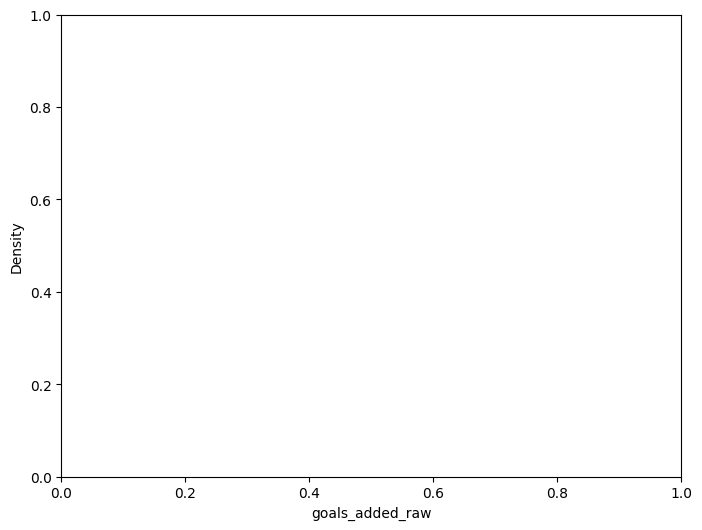

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap,Normalize
from matplotlib.cm import ScalarMappable, get_cmap

# Step 1: Expand the 'data' column into rows
expanded_data = main_df.explode('data')

# Step 2: Normalize the 'data' column (convert list of dictionaries into columns)
expanded_data = pd.concat(
    [expanded_data.drop(columns=['data']), expanded_data['data'].apply(pd.Series)],
    axis=1
)

# Step 3: Create a custom colormap (red -> yellow -> green)
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]  # Red -> Yellow -> Green
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)


# Step 4: Normalize the 'goals_added_raw' values for consistent coloring
players = expanded_data['player_id'].unique()
all_values = expanded_data['goals_added_raw']
norm = Normalize(vmin=all_values.min(),vmax = all_values.max()) # Normalize across all players
cmap = get_cmap("jet") # Use a colormap )

for player_id in players:
    # Filter data for the current player
    player_data = expanded_data[expanded_data['player_id'] == player_id]
    
    # Skip if there are not enough data points
    if player_data['goals_added_raw'].dropna().shape[0] < 2:
        print(f"Skipping player {player_id} due to insufficient data.")
        continue

    # Create a histogram or KDE plot for 'goals_added_raw'
    plt.figure(figsize=(8, 6))
    kde = sns.kdeplot(player_data['goals_added_raw'], fill=False, color='black', linewidth=1.5)
    
    # Get the KDE values
    line = kde.get_lines()
    if not line:  # Check if KDE plot was generated
        print(f"No KDE plot generated for player {player_id}. Skipping.")
        continue
    x, y = line[0].get_data()

    # Fill the area under the curve with colors
    for i in range(len(x) - 1):
        plt.fill_between(
            x[i:i+2], 0, y[i:i+2],
            color=custom_cmap(norm(x[i])),  # Map the x-value to a color
            alpha=0.8
        )
    
    # Add labels and title
    player_name = player_data['player_name'].iloc[0]  # Get the player's name
    plt.title(f"Career Goals Added Distribution for {player_name}", fontsize=14)
    plt.xlabel("Goals Added (Raw)", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    
    import os
    output_dir = "Player Distributions"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # Show the plot
    plt.savefig(f"{output_dir}/{player_name}_distr")
    plt.close()

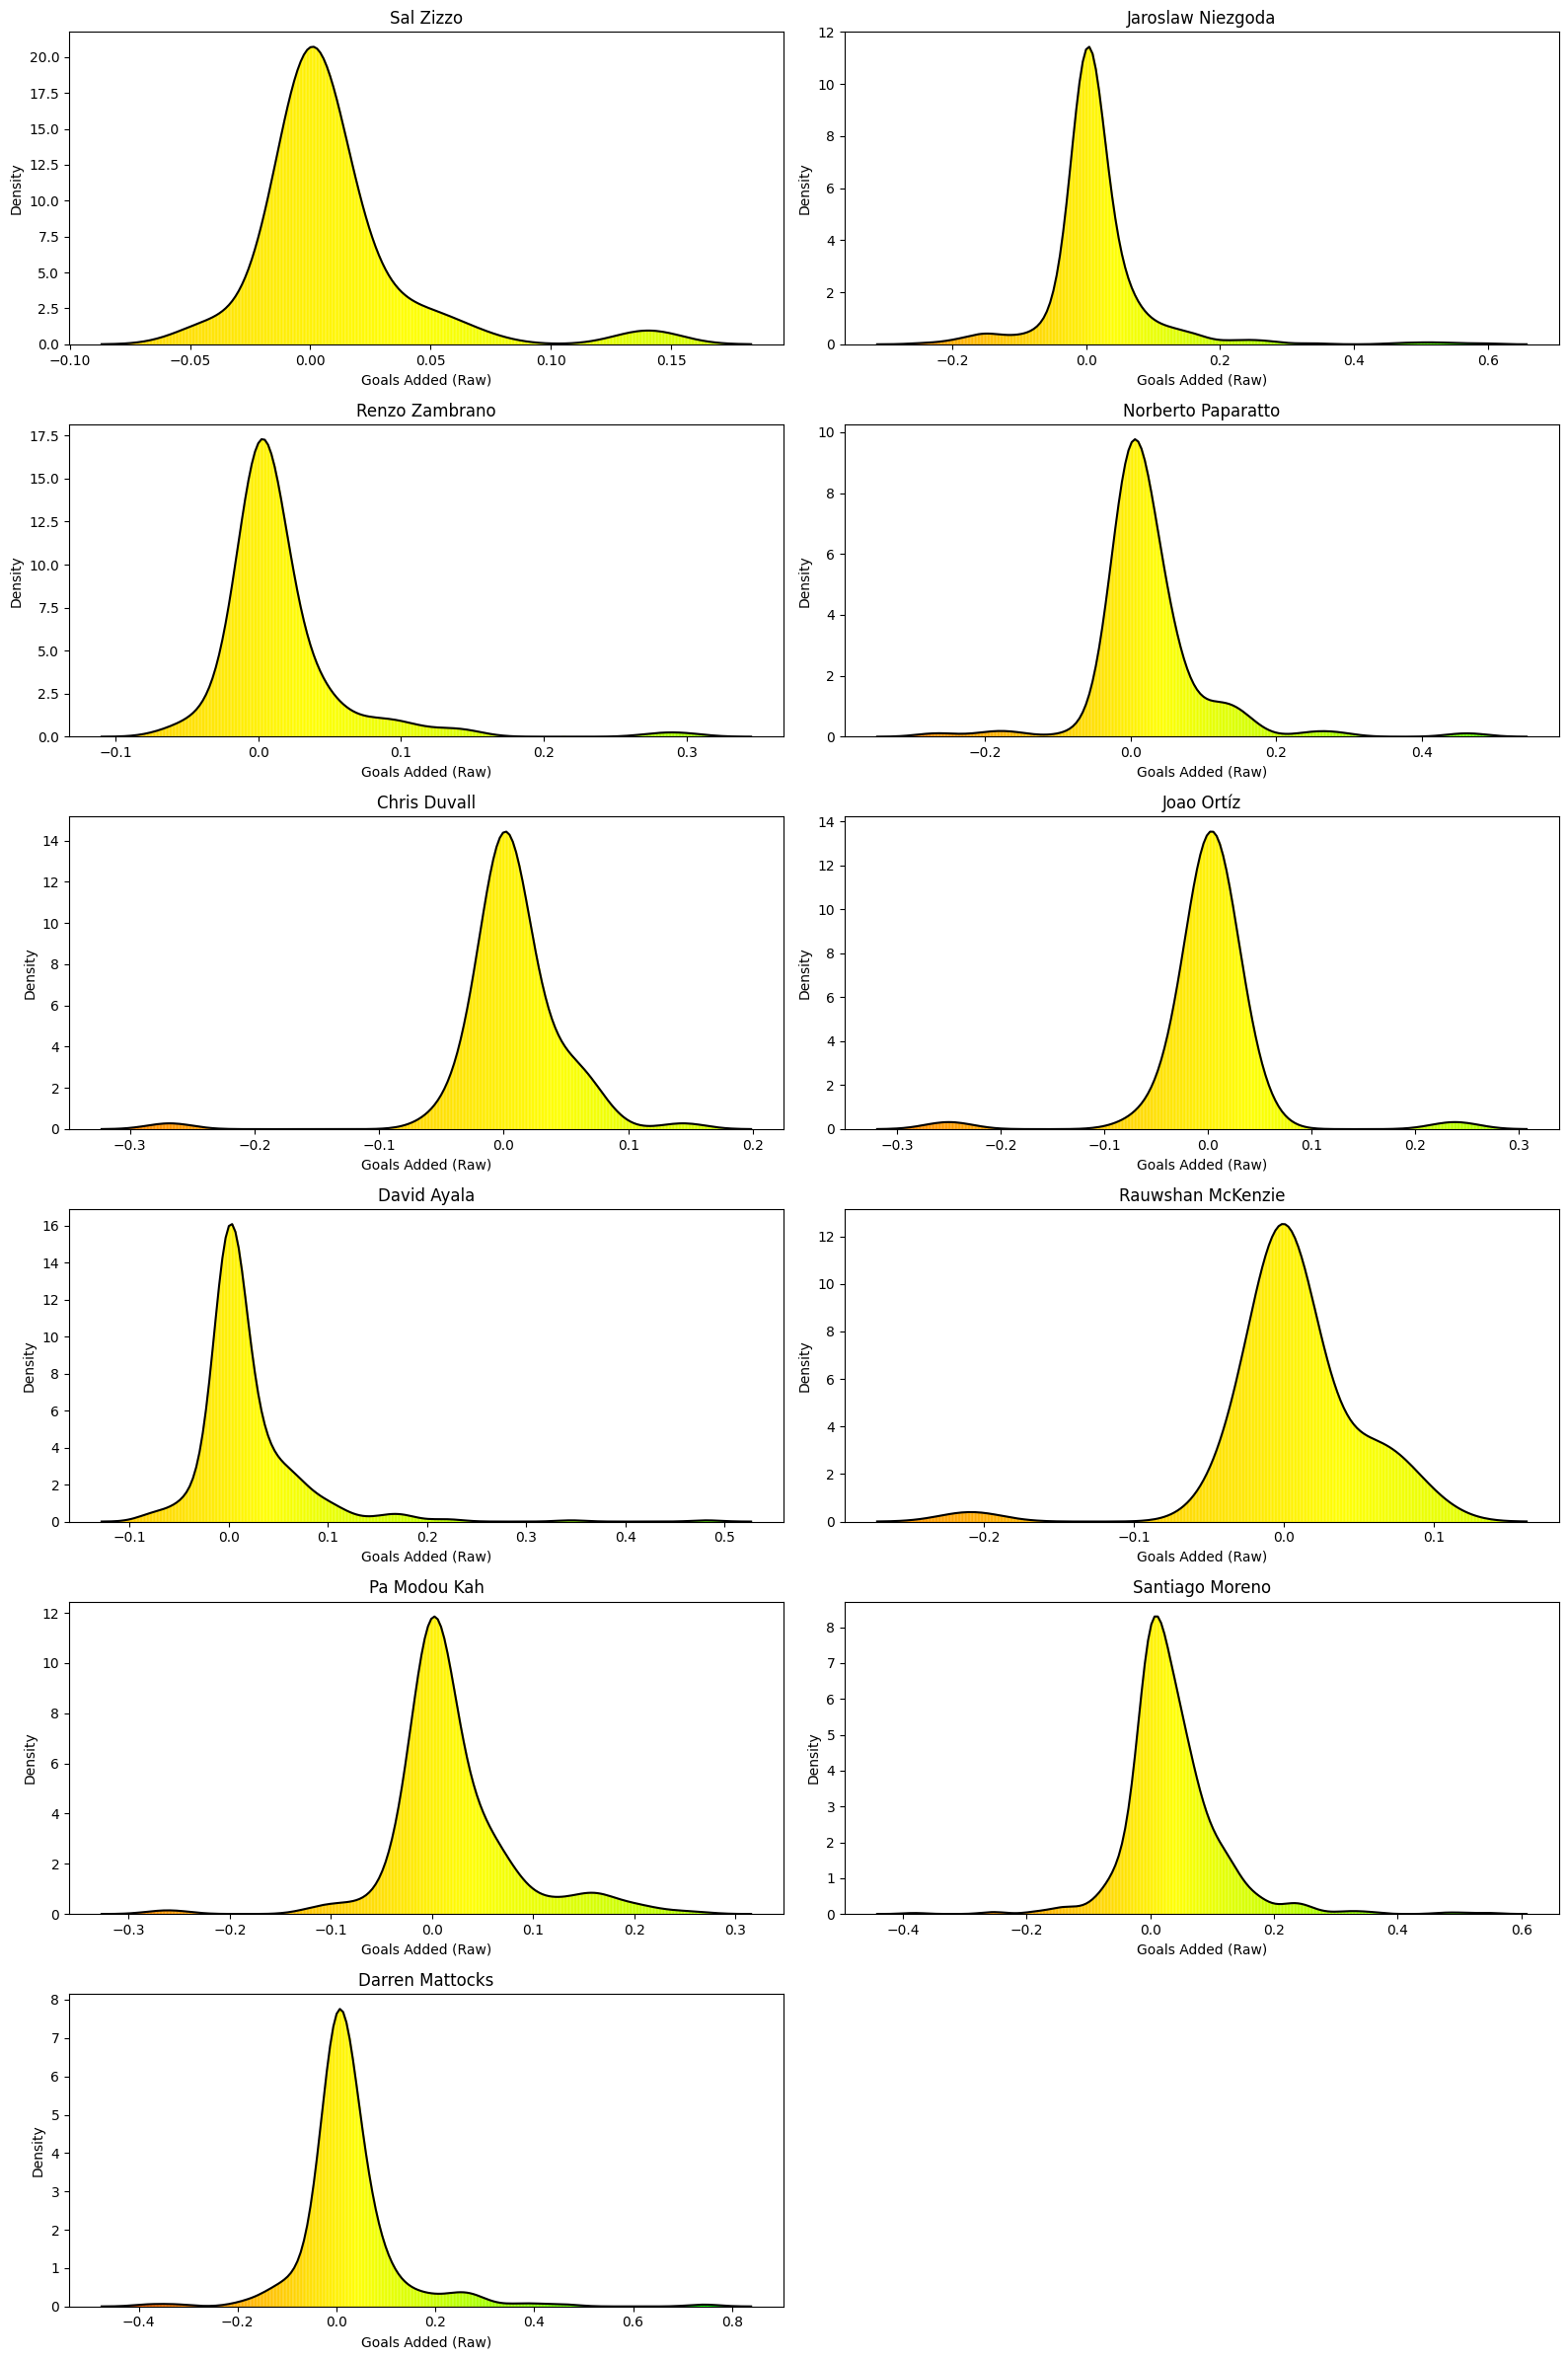

In [11]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Step 1: Create a custom colormap (red -> yellow -> green)
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]  # Red -> Yellow -> Green
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Step 2: Normalize the 'goals_added_raw' values with 0.0 as the midpoint
all_values = expanded_data['goals_added_raw']
norm = Normalize(vmin=all_values.min(), vmax=all_values.max())  # Normalize across all players

# Step 3: Get a list of unique player IDs and randomly sample 11 players
players = expanded_data['player_id'].unique()
random_players = random.sample(list(players), 11)

# Step 4: Create a 6x2 grid for subplots
fig, axes = plt.subplots(6, 2, figsize=(16, 24))  # 6 rows, 2 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Step 5: Plot each player's distribution in a subplot
for i, player_id in enumerate(random_players):
    # Filter data for the current player
    player_data = expanded_data[expanded_data['player_id'] == player_id]
    
    # Skip if there are not enough data points
    if player_data['goals_added_raw'].dropna().shape[0] < 2:
        print(f"Skipping player {player_id} due to insufficient data.")
        continue
    
    # Create a KDE plot for 'goals_added_raw'
    kde = sns.kdeplot(player_data['goals_added_raw'], ax=axes[i], fill=False, color='black', linewidth=1.5)
    
    # Get the KDE values
    line = kde.get_lines()
    if not line:  # Check if KDE plot was generated
        print(f"No KDE plot generated for player {player_id}. Skipping.")
        continue
    x, y = line[0].get_data()  # Extract x and y data from the first Line2D object
    
    # Fill the area under the curve with colors
    for j in range(len(x) - 1):
        axes[i].fill_between(
            x[j:j+2], 0, y[j:j+2],
            color=custom_cmap(norm(x[j])),  # Map the x-value to the custom colormap
            alpha=0.8
        )
    
    # Add title to each subplot
    player_name = player_data['player_name'].iloc[0]  # Get the player's name
    axes[i].set_title(player_name, fontsize=12)
    axes[i].set_xlabel("Goals Added (Raw)")
    axes[i].set_ylabel("Density")

# Step 6: Hide any unused subplots
for j in range(len(random_players), len(axes)):
    fig.delaxes(axes[j])

# Step 7: Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [12]:
expanded_data.columns

Index(['player_id', 'game_id', 'team_id', 'general_position', 'minutes_played',
       'player_name', 'birth_date', 'nationality', 'primary_broad_position',
       'primary_general_position', 'secondary_broad_position',
       'secondary_general_position', 'season_name', 'height_ft', 'height_in',
       'weight_lb', 'competition', 'action_type', 'goals_added_raw',
       'goals_added_above_avg', 'count_actions'],
      dtype='object')

In [18]:

games['date_only'] = pd.to_datetime(games['date_time_utc']).dt.date
games = games[['game_id','date_only']]
games.head()

,game_id,date_only
0,raMyj2LO5d,2025-05-05
1,gjMNpdn0qK,2025-05-04
2,Pk5LpdmO5O,2025-05-04
3,EGMPadeV5a,2025-05-03
4,315VpEZ9Q9,2025-05-03


In [24]:
expanded_data = pd.merge(expanded_data,games,on="game_id",how="left")


In [40]:
expanded_data["date_only"] = pd.to_datetime(expanded_data["date_only"]).dt.date()
print(expanded_data.dtypes)
expanded_data[expanded_data["date_only"] == pd.to_datetime('2023-05-21').dt.date()]

TypeError: 'Series' object is not callable

In [39]:
print(expanded_data['date_only'].sort_values().unique())  # Check available dates in the dataset

<DatetimeArray>
['2013-03-04 00:00:00', '2013-03-10 00:00:00', '2013-03-17 00:00:00',
 '2013-03-30 00:00:00', '2013-04-07 00:00:00', '2013-04-15 00:00:00',
 '2013-04-22 00:00:00', '2013-04-28 00:00:00', '2013-05-03 00:00:00',
 '2013-05-09 00:00:00',
 ...
 '2023-04-09 00:00:00', '2023-04-16 00:00:00', '2023-04-22 00:00:00',
 '2023-04-30 00:00:00', '2023-05-07 00:00:00', '2023-05-14 00:00:00',
 '2023-05-18 00:00:00', '2023-05-21 00:00:00', '2023-05-28 00:00:00',
                 'NaT']
Length: 373, dtype: datetime64[ns]


In [42]:
expanded_data[expanded_data['player_name'] == 'Kevin Kelsy']

,player_id,game_id,team_id,general_position,minutes_played,player_name,birth_date,nationality,primary_broad_position,primary_general_position,...,season_name,height_ft,height_in,weight_lb,competition,action_type,goals_added_raw,goals_added_above_avg,count_actions,date_only
30954,NWMWgLbEMl,0Oq6bWLxq6,WBLMvYAQxe,ST,22,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Dribbling,0.0301,0.0344,5,NaT
30955,NWMWgLbEMl,0Oq6bWLxq6,WBLMvYAQxe,ST,22,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Fouling,-0.0035,-0.0065,2,NaT
30956,NWMWgLbEMl,0Oq6bWLxq6,WBLMvYAQxe,ST,22,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Interrupting,0.0137,0.0063,1,NaT
30957,NWMWgLbEMl,0Oq6bWLxq6,WBLMvYAQxe,ST,22,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Passing,-0.0087,-0.0004,6,NaT
30958,NWMWgLbEMl,0Oq6bWLxq6,WBLMvYAQxe,ST,22,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Receiving,0.0234,-0.0229,5,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31015,NWMWgLbEMl,Xj5Ypb90Mb,WBLMvYAQxe,ST,19,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Fouling,0.0000,-0.0026,0,NaT
31016,NWMWgLbEMl,Xj5Ypb90Mb,WBLMvYAQxe,ST,19,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Interrupting,0.0182,0.0118,1,NaT
31017,NWMWgLbEMl,Xj5Ypb90Mb,WBLMvYAQxe,ST,19,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Passing,0.0060,0.0131,5,NaT
31018,NWMWgLbEMl,Xj5Ypb90Mb,WBLMvYAQxe,ST,19,Kevin Kelsy,2004-07-27,Venezuela,FW,ST,...,"[2024, 2025]",6.0,2.0,187.0,mls,Receiving,0.2576,0.2176,7,NaT


In [45]:
games[str(games['game_id']) == '0Oq6bWLxq6']

KeyError: False

In [57]:
# Step 3: Get player g+ just for Timbers
gplus_data = asa.get_player_goals_added(
    leagues=["mls"],
    season_name=['2025'],
    team_ids=[timbers_id],  # Now passing a real string inside a list
    split_by_games=True
)

games = asa.get_games(seasons=['2025'])


games['date_only'] = pd.to_datetime(games['date_time_utc']).dt.date
games = games[['game_id','date_only']]
games.head()

,game_id,date_only
0,eVq3bDJy5W,2025-05-05
0,raMyj2LO5d,2025-05-05
1,jYQJmLlBqG,2025-05-05
0,0x5gjV1bM7,2025-05-04
1,vzqoKbZZqa,2025-05-04


In [58]:
expanded_data = pd.merge(expanded_data,games,on="game_id",how="left")


In [89]:
games = asa.get_games(seasons=['2025'])
games['date_only'] = pd.to_datetime(games['date_time_utc']).dt.date
games['game_id'] = games['game_id'].astype(str)
print(games.dtypes)
print(games[games['game_id'] == 'jYQJmLlBqG'])
games.dtypes

game_id              object
date_time_utc        object
home_score            int64
away_score            int64
home_team_id         object
away_team_id         object
referee_id           object
stadium_id           object
home_manager_id      object
away_manager_id      object
expanded_minutes      int64
season_name           int64
matchday              int64
attendance            int64
knockout_game          bool
status               object
last_updated_utc     object
penalties           float64
home_penalties      float64
away_penalties      float64
date_only            object
dtype: object
      game_id            date_time_utc  home_score  away_score home_team_id  \
1  jYQJmLlBqG  2025-05-05 00:00:00 UTC           5           0   Oa5wDy8q14   

  away_team_id  referee_id  stadium_id home_manager_id away_manager_id  ...  \
1   zeQZe4DqKw  vzqokzpqap  9Yqd9XkQvJ      aDQ0bg35Ev      BLMvEB3Qxe  ...   

   season_name  matchday  attendance  knockout_game    status  \
1         2025 

game_id              object
date_time_utc        object
home_score            int64
away_score            int64
home_team_id         object
away_team_id         object
referee_id           object
stadium_id           object
home_manager_id      object
away_manager_id      object
expanded_minutes      int64
season_name           int64
matchday              int64
attendance            int64
knockout_game          bool
status               object
last_updated_utc     object
penalties           float64
home_penalties      float64
away_penalties      float64
date_only            object
dtype: object

In [96]:
df = pd.merge(gplus_data,games[['game_id','date_only']],on='game_id',how='left')
df['date_only'].sort_values(ascending=False).head(20)

24     2025-05-04
121    2025-05-04
138    2025-05-04
63     2025-05-04
93     2025-05-04
130    2025-05-04
71     2025-05-04
13     2025-05-04
33     2025-05-04
109    2025-05-04
83     2025-05-04
53     2025-05-04
106    2025-05-04
3      2025-05-04
113    2025-05-04
122    2025-04-28
65     2025-04-28
80     2025-04-28
55     2025-04-28
95     2025-04-28
Name: date_only, dtype: object

In [95]:
df.head(20)

,player_id,game_id,team_id,general_position,minutes_played,data,date_only
0,2lqRk1raQr,0Oq6bWLxq6,WBLMvYAQxe,CB,101,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-03-30
1,2lqRk1raQr,2lqRpz7JMr,WBLMvYAQxe,CB,97,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-04-05
2,2lqRk1raQr,315Vpbk6Q9,WBLMvYAQxe,CB,19,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-03-09
3,2lqRk1raQr,4wM4b3pNqj,WBLMvYAQxe,CB,100,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-05-04
4,2lqRk1raQr,aDQ0bpl35E,WBLMvYAQxe,CB,104,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-04-13
5,2lqRk1raQr,gjMNpb7DqK,WBLMvYAQxe,CB,101,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-04-28
6,2lqRk1raQr,KPqjjZKyq6,WBLMvYAQxe,CB,75,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-03-16
7,2lqRk1raQr,NPqxjpngM9,WBLMvYAQxe,CB,11,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-02-23
8,2lqRk1raQr,NWMWpbgE5l,WBLMvYAQxe,CB,111,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-04-20
9,2lqRk1raQr,Xj5Ypb90Mb,WBLMvYAQxe,CB,96,"[{'action_type': 'Dribbling', 'goals_added_raw...",2025-03-23
